# TensorFlow를 활용한 선형회귀 실습

이 노트북에서는 TensorFlow를 사용하여 간단한 선형회귀 문제를 풀어봅니다.

## 주요 단계
1. 데이터 생성 (y = 3x + 2 + 잡음)
2. 모델 정의 (Dense Layer)
3. 손실 함수 및 최적화 방법 설정
4. 학습 진행 및 시각화


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


## 1. 데이터 생성

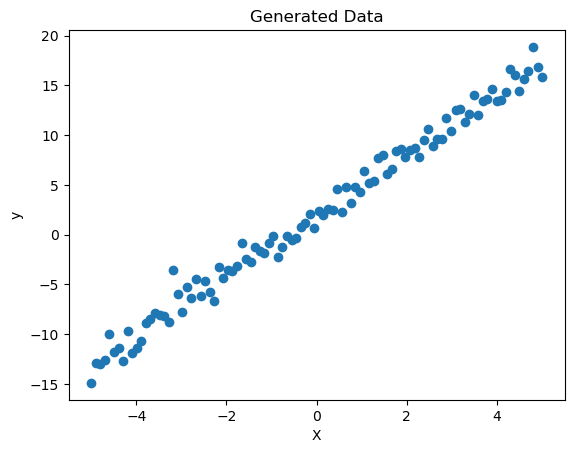

In [2]:
# y = 3x + 2 + noise
n_samples = 100
X = np.linspace(-5, 5, n_samples)
y = 3 * X + 2 + np.random.normal(0, 1, n_samples)

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Data")
plt.show()

## 2. 모델 정의

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

## 3. 모델 컴파일
- 손실 함수: MSE (Mean Squared Error)
- 최적화 방법: SGD (Stochastic Gradient Descent)

In [4]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='mse')

## 4. 모델 학습

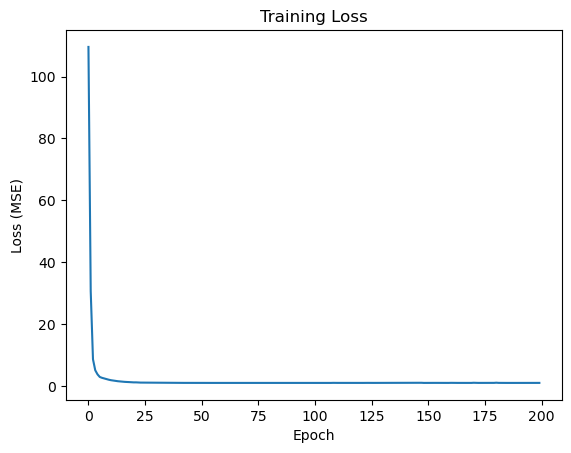

In [5]:
history = model.fit(X, y, epochs=200, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss')
plt.show()

## 5. 결과 확인

학습된 기울기 W: 3.040, 절편 b: 2.114
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


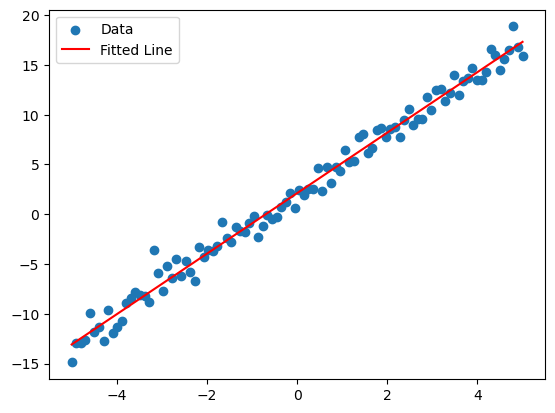

In [6]:
W, b = model.layers[0].get_weights()
print(f"학습된 기울기 W: {W[0][0]:.3f}, 절편 b: {b[0]:.3f}")

y_pred = model.predict(X)

plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.legend()
plt.show()

## 생각해보기
- 학습 샘플 수가 작아지면 어떻게 되는가?


1. 과적합(Overfitting) 위험 증가
  작은 데이터셋의 잡음까지 모델이 외워버림
  훈련 데이터 성능은 좋아도, 테스트 데이터에서는 성능이 급격히 나빠짐

2. 모수 추정 불안정
  회귀 계수 w, 편향 b 값이 데이터에 따라 크게 요동
  같은 모델이라도 실행마다 결과가 크게 달라질 수 있음

3. 일반화 성능 저하
  새로운 데이터에 대해 예측이 부정확
  특히 데이터가 원래 분산이 큰 경우, 작은 샘플로는 진짜 패턴을 파악하기 힘듦

- 학습 샘플에 잡음이 많으면 어떻게 되는가? 이 경우 학습 데이터가 많이 필요한가?

1. 잡음이 많으면 : 데이터가 흩어져서 모델이 원래 관계를 잘 못 찾음
2. 적은 데이터 + 큰 잡음 : 과적합 위험, 모델 불안정
3. 많은 데이터 + 큰 잡음 : 잡음이 평균적으로 상쇄 → 모델이 본질적 패턴을 더 잘 학습
4. 따라서 잡음이 많을수록 학습 데이터 양이 더 필요합니다.